<a href="https://colab.research.google.com/github/gustavogchiavarini/Analise-Dados/blob/main/Planilhas_Excel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [2]:
#Leitura dos arquivos
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [3]:
#Juntando todos os arquivos
df = pd.concat([df1, df2, df3,df5])

In [4]:
#Exibindo as 5 primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [5]:
#Exibindo as últimas linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [6]:
#Verificando tipo de dado de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [7]:
#Alterando tipo de dado da coluna LojaID
df["lojaID"] = df["LojaID"].astype("object")


# **Tratando valores faltantes**

In [ ]:
#Consultando linhas com valores faltantes
df.isnull().sum()

In [9]:
#Substituindo os valores nulos pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace = True)


In [15]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
lojaID    0
dtype: int64

In [16]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,lojaID
59,Fortaleza,2019-01-01,6.31,1002,3,1002
151,Natal,2019-01-02,14.63,1035,1,1035
202,Natal,2019-01-02,22.45,1036,1,1036
181,Natal,2019-01-02,244.83,1037,2,1037
116,Aracaju,2018-01-01,48.44,1522,4,1522
28,Salvador,2019-01-01,162.34,1035,2,1035
110,Natal,2019-01-02,185.93,1036,3,1036
34,Fortaleza,2019-01-01,3.10,1003,5,1003
6,Aracaju,2018-01-01,35.50,1522,2,1522
91,Natal,2019-01-02,17.74,1035,1,1035


In [72]:
#Substuindo valores nulos por zero (Outra abordagem possível)
df["Vendas"].fillna(0, inplace=True)

In [73]:
#Apagando as linhas com valores nulos (Outra abordagem possível)
df.dropna(inplace=True)


In [74]:
#Apagando as linhas com valores nulos com base em 1 coluna (Outra abordagem possível)
df.dropna(subset = ["Vendas"], inplace = True)

In [75]:
#Removendo linhas que estejam com valores faltantes em todas as colunas (Outra abordagem possível)
df.dropna(how="all", inplace=True)

# **Criando Novas Colunas**

In [26]:
#Criando a coluna receita
df ["Receitas"] = df["Vendas"].mul(df["Qtde"])

In [27]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,lojaID,Receitas
0,Aracaju,2018-01-01,142.00,1520,1,1520,142.00
1,Aracaju,2018-01-01,14.21,1522,6,1522,85.26
2,Aracaju,2018-01-01,71.55,1520,1,1520,71.55
3,Aracaju,2018-01-01,3.01,1521,7,1521,21.07
4,Aracaju,2018-01-01,24.51,1522,8,1522,196.08


In [28]:
#Caso fosse necessário enconrar a receita
df["Receitas/Vendas"] = df["Receitas"] / df["Vendas"]

In [29]:
#Encontrando a maior receita
df["Receitas"].max()

3544.0

In [30]:
#Menor receita
df.nsmallest(3, "Receitas")

,Cidade,Data,Vendas,LojaID,Qtde,lojaID,Receitas,Receitas/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,1522,3.34,1.0
92,Natal,2019-01-02,4.57,1035,1,1035,4.57,1.0
92,Salvador,2019-01-01,4.57,1035,1,1035,4.57,1.0


In [31]:
#Retorna a linha completa com base no argumento/parâmetro
df.nlargest(5, "Receitas")

,Cidade,Data,Vendas,LojaID,Qtde,lojaID,Receitas,Receitas/Vendas
7,Natal,2019-03-18,886.0,853,4,853,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,852,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,854,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,853,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,852,3340.0,4.0


In [32]:
#Agrupamento por cidade
df.groupby("Receitas")["Cidade"].sum()

Receitas
3.34             Aracaju
4.57       NatalSalvador
5.13       NatalSalvador
5.80       NatalSalvador
5.82       NatalSalvador
               ...      
3312.00       NatalNatal
3340.00            Natal
3424.00            Natal
3436.00       NatalNatal
3544.00            Natal
Name: Cidade, Length: 578, dtype: object

In [33]:
#Ordenando o conjunto de dados
df.sort_values("Receitas", ascending=False).head()

,Cidade,Data,Vendas,LojaID,Qtde,lojaID,Receitas,Receitas/Vendas
7,Natal,2019-03-18,886.0,853,4,853,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,852,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,854,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,853,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,852,3340.0,4.0


# **Trabalhando com datas**

In [17]:
#Transformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

In [18]:
df.dtypes

Cidade     object
Data        int64
Vendas    float64
LojaID      int64
Qtde        int64
lojaID     object
dtype: object

In [19]:
#Verificando o tipo de dado de cada coluna
df.dtypes

Cidade     object
Data        int64
Vendas    float64
LojaID      int64
Qtde        int64
lojaID     object
dtype: object

In [20]:
#Transformando coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])

In [34]:
#Agrupamento por ano
df.groupby(df["Data"].dt.year)["Receitas"].sum()

Data
2018    118176.53
2019    176309.94
Name: Receitas, dtype: float64

In [35]:
#Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [36]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,lojaID,Receitas,Receitas/Vendas,Ano_Venda
60,Fortaleza,2019-01-01,182.14,1002,4,1002,728.56,4.0,2019
6,Natal,2018-07-02,322.00,852,4,852,1288.00,4.0,2018
34,Natal,2019-01-07,484.00,852,2,852,968.00,2.0,2019
93,Salvador,2019-01-01,15.58,1037,1,1037,15.58,1.0,2019
106,Fortaleza,2019-01-01,28.42,1002,3,1002,85.26,3.0,2019


In [37]:
#Extraindo o mês e o dia da venda
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [38]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [39]:
#Calculando a diferença de dias
df["Diferenca_Dias"]=df["Data"] - df["Data"].min()

In [40]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,lojaID,Receitas,Receitas/Vendas,Ano_Venda,mes_venda,dia_venda,Diferenca_Dias
14,Aracaju,2018-01-01,148.21,1521,3,1521,444.63,3.0,2018,1,1,0 days
25,Salvador,2019-01-01,220.62,1035,1,1035,220.62,1.0,2019,1,1,365 days
147,Salvador,2019-01-02,34.50,1035,1,1035,34.50,1.0,2019,1,2,366 days
58,Natal,2018-12-23,272.00,853,3,853,816.00,3.0,2018,12,23,356 days
69,Fortaleza,2019-01-01,216.65,1003,6,1003,1299.90,6.0,2019,1,1,365 days


In [41]:
df["Trimestre_Venda"] = df["Data"].dt.quarter

In [42]:
#Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [43]:
vendas_marco_19.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,lojaID,Receitas,Receitas/Vendas,Ano_Venda,mes_venda,dia_venda,Diferenca_Dias,Trimestre_Venda
113,Salvador,2019-03-02,18.90,1034,3,1034,56.70,3.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,981,24.00,3.0,2019,3,2,425 days,1
45,Natal,2019-03-11,431.00,852,3,852,1293.00,3.0,2019,3,11,434 days,1
133,Salvador,2019-03-02,153.71,1035,1,1035,153.71,1.0,2019,3,2,425 days,1
125,Fortaleza,2019-03-02,37.60,983,4,983,150.40,4.0,2019,3,2,425 days,1


# **Visualização de Dados**


In [44]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
1522     41
1520     39
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
983      13
982      10
981       6
980       5
Name: LojaID, dtype: int64

<Axes: >

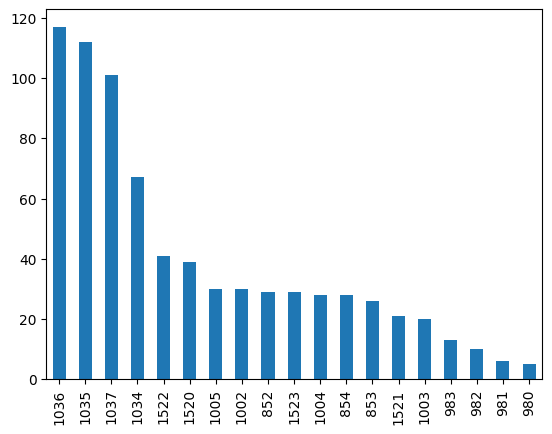

In [45]:
#Grafico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

<Axes: >

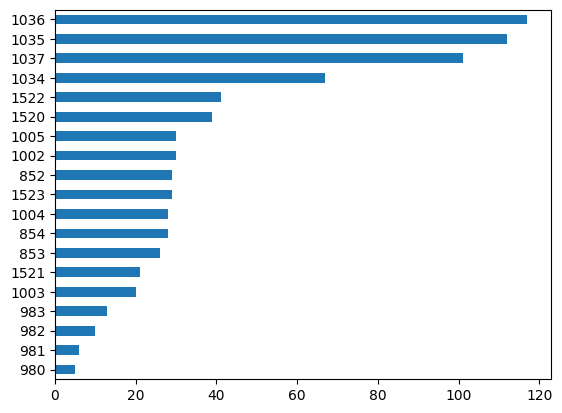

In [46]:
#Barras horizontais
df["LojaID"].value_counts(ascending=True).plot.barh()

<Axes: ylabel='Receitas'>

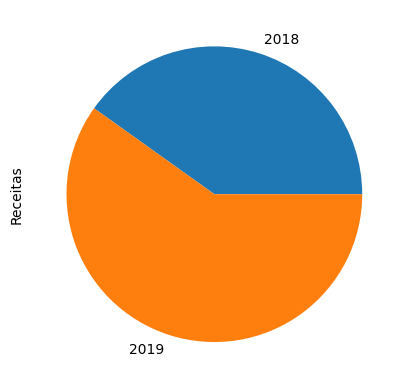

In [47]:
#Gráfico De Pizza
df.groupby(df["Data"].dt.year)["Receitas"].sum().plot.pie()


In [48]:
#Total de vendas por cidade
df["Cidade"].value_counts()



Natal        240
Salvador     240
Fortaleza    142
Aracaju      130
Name: Cidade, dtype: int64

Text(0, 0.5, 'Total Vendas')

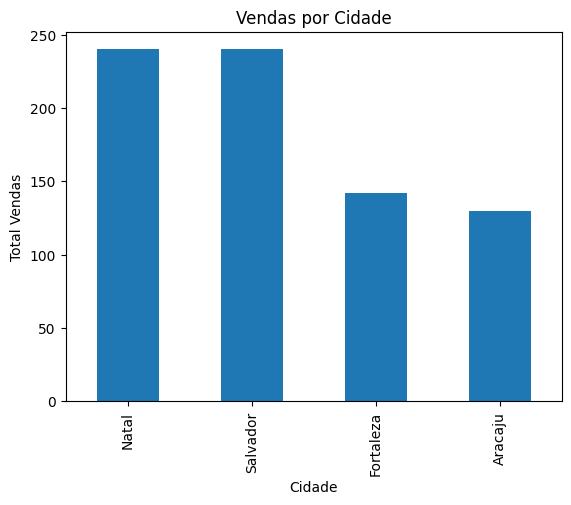

In [49]:
#Adicionando titulo e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas")




Text(0, 0.5, 'Total Vendas')

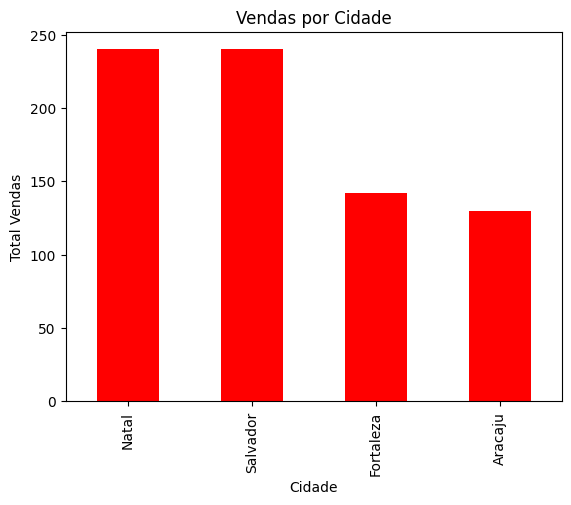

In [51]:
#Alterando a cor
df["Cidade"].value_counts().plot.bar(title="Vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas")

In [52]:
df["mes_vendas"] = df["Data"].dt.month

In [53]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,lojaID,Receitas,Receitas/Vendas,Ano_Venda,mes_venda,dia_venda,Diferenca_Dias,Trimestre_Venda,mes_vendas
101,Fortaleza,2019-01-01,11.67,1005,4,1005,46.68,4.0,2019,1,1,365 days,1,1
128,Aracaju,2018-01-01,37.49,1521,2,1521,74.98,2.0,2018,1,1,0 days,1,1
89,Natal,2019-01-02,17.46,1034,1,1034,17.46,1.0,2019,1,2,366 days,1,1
88,Fortaleza,2019-01-01,68.60,1004,6,1004,411.60,6.0,2019,1,1,365 days,1,1
75,Salvador,2019-01-01,155.52,1034,1,1034,155.52,1.0,2019,1,1,365 days,1,1


In [54]:
#Alterando Estilo
plt.style.use("ggplot")

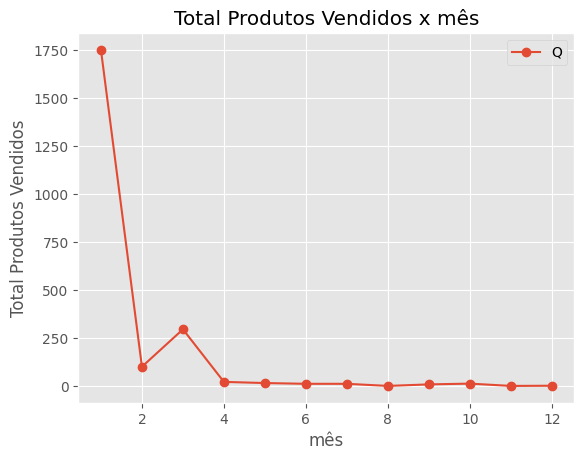

In [55]:
df.groupby(df["mes_vendas"])["Qtde"].sum().plot(title="Total Produtos Vendidos x mês", marker = 'o')
plt.xlabel("mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend("Quantidade")

In [56]:
df.groupby(df["mes_vendas"])["Qtde"].sum()

mes_vendas
1     1753
2      102
3      297
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [60]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]



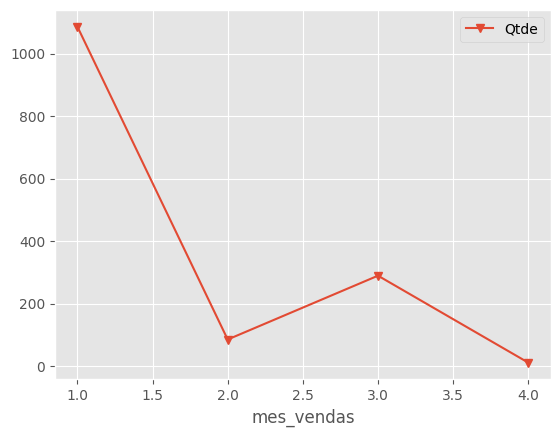

In [69]:
#Total produtos por mês
df_2019.groupby(df_2019["mes_vendas"])["Qtde"].sum().plot(marker="v")
plt.xlabel=("Mês")
plt.ylabel=("Total Produtos Vendidos");
plt.legend()


(array([178., 182., 195.,  69.,  36.,  40.,  16.,  16.,  14.,   6.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

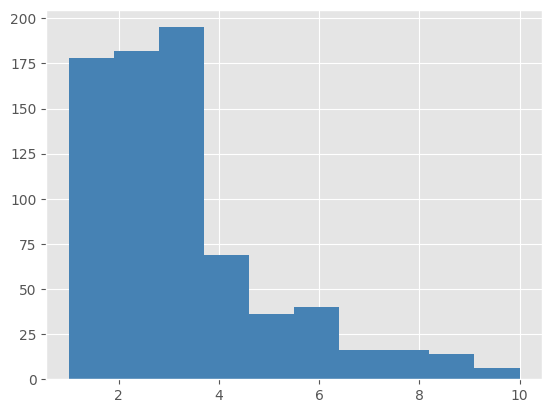

In [64]:
#histograma
plt.hist(df["Qtde"], color="steelblue")

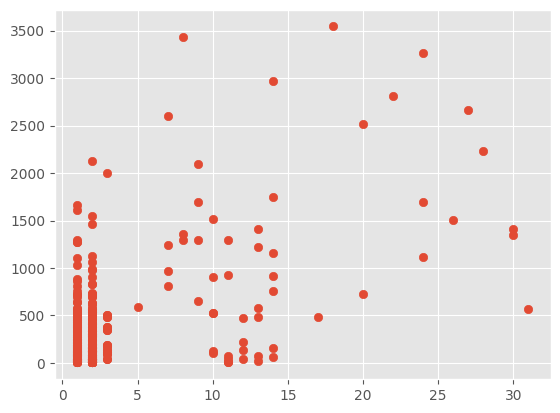

In [68]:
#Gráfico de Disperção
plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receitas"]);

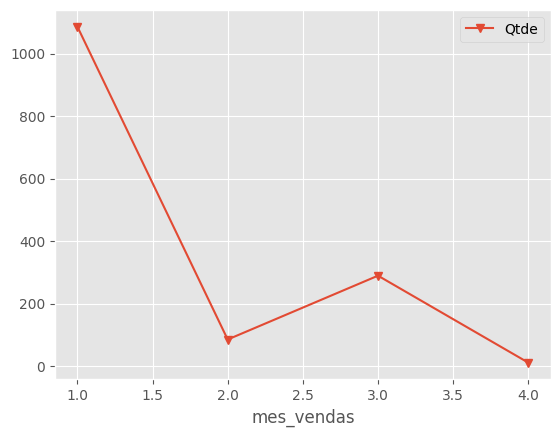

In [71]:
#Salvando em PNG
df_2019.groupby(df_2019["mes_vendas"])["Qtde"].sum().plot(marker="v")
plt.xlabel=("Mês")
plt.ylabel=("Total Produtos Vendidos");
plt.legend()
plt.savefig("grafico QTDE x MES.png")

